# **Modelagem Matemática e Computacional - Aula prática 6**
### Nome: Riquelme Freitas Gomes
### Data: 18/09/2023
<br>

# **Objetivo:**
> ### Estudar e pôr em prática a análise de dados utilizando o método DMD, visto em aula.

# **Dynamic Mode Decomposition (DMD)**

> #### O método DMD (Dynamic Mode Decomposition) é uma técnica de análise de dados que é amplamente usada para extrair informações significativas de conjuntos de dados complexos, especialmente em aplicações relacionadas à dinâmica de sistemas. Ele foi desenvolvido na comunidade de dinâmica de fluidos, mas encontrou aplicações em uma variedade de campos, incluindo engenharia, física, biologia e finanças.

<br>

#### A ideia principal por trás do método DMD é decompor um conjunto de dados dinâmicos, geralmente representado por uma série temporal de observações, em modos dinâmicos (também chamados de modos DMD) que representam os padrões espaciais e temporais subjacentes nos dados. Esses modos são extraídos usando técnicas de álgebra linear e análise espectral.
<br>

#### Aqui estão os passos básicos do método DMD:
1. #### **Coleta de Dados:** Primeiro, você coleta um conjunto de dados que representa a evolução temporal de algum sistema dinâmico. Isso pode ser feito através de sensores, simulações computacionais, medições experimentais, etc.

2. #### **Divisão de Dados:** Os dados são divididos em duas séries temporais sobrepostas, geralmente chamadas de $X$ e $X'$. $X$ contém os dados em um dado momento, enquanto $X'$ contém os dados em um momento subsequente.

3. #### **Construção das Matrizes de Dados:** Com base nas séries temporais $X$ e $X'$, você constrói duas matrizes de dados, geralmente chamadas de $A$ e $B$, onde $A$ contém os dados em $X$ e $B$ contém os dados em $X'$. A matriz $B$ é uma versão deslocada no tempo da matriz $A$.

4. #### **Decomposição Espectral:** A próxima etapa envolve calcular a decomposição espectral da matriz $A$. Isso é feito usando a SVD (Decomposição em Valores Singulares), que fornece os modos DMD.

5. #### **Seleção de Modos DMD:** Os modos DMD representam as principais estruturas dinâmicas nos dados. Dependendo do problema, você pode escolher um número limitado de modos DMD para representar o sistema de maneira eficaz. Esses modos podem ser usados para prever a evolução futura do sistema, analisar suas propriedades de estabilidade e identificar padrões importantes.

6. #### **Reconstrução e Previsão:** Com os modos DMD selecionados, você pode reconstruir a evolução temporal do sistema ou fazer previsões futuras com base nesses modos.
<br>

#### O método DMD é especialmente útil quando se lida com sistemas dinâmicos complexos nos quais os modos subjacentes não são facilmente observáveis ou interpretáveis diretamente nos dados brutos. Ele oferece uma maneira eficaz de simplificar e compreender a dinâmica de tais sistemas, tornando-o uma ferramenta valiosa em uma variedade de aplicações científicas e de engenharia.

## **Princípios Básicos**

 #### $⇒$ O método DMD é uma técnica de análise de dados que extrai modos dinâmicos a partir de observações experimentais ou simulações computacionais.
<br>

#### $⇒$ Ele foi proposto em 2010 por Peter Schmid e Jonathan Tu, dois pesquisadores da área de fluidos.
<br>

#### $⇒$ O DMD é aplicável em uma ampla variedade de áreas, incluindo engenharia, física, biologia, finanças, entre outras.
<br>

#### $⇒$ O método DMD é baseado na decomposição em valores singulares (SVD) de uma matriz de dados $X$:
#### $X = UΣV^∗$, onde $U$ e $V$ são matrizes unitárias, e $Σ$ é uma matriz diagonal contendo os valores singulares.
<br>

#### $⇒$ A matriz $X$ é formada por observações de uma variável ao longo do tempo.
<br>

#### $⇒$ O objetivo do DMD é aproximar a matriz $X$ por uma matriz de baixo rank $X_r$, que contém os $r$ maiores valores singulares.

## **Operador de Koopman**

> #### O operador de Koopman é um conceito fundamental na teoria dos sistemas dinâmicos, utilizado para analisar e modelar a evolução temporal de sistemas complexos. Foi introduzido pelo matemático B.O. Koopman em 1931 e tem aplicações significativas em uma variedade de campos, incluindo física, biologia, engenharia e economia.

<br>

#### O operador de Koopman é uma representação matemática que descreve como as funções ou observáveis de um sistema dinâmico evoluem ao longo do tempo. Ele age sobre funções do espaço de estado do sistema e mapeia essas funções de um instante no tempo para outro.
<br>

#### O operador Koopman $U_t$ é definido como:
$U_tf (x_0) = f (T_t(x_0))$,
#### onde $T_t$ é o operador de evolução temporal do sistema dinâmico e $f$ é uma função de observação.

<br>

#### **Observações**:
* #### O operador de Koopman é um operador linear que age em funções do espaço de estado de um sistema dinâmico e mapeia essas funções em outras funções do espaço de estado.

* #### Em outras palavras, o operador de Koopman descreve a evolução temporal de funções do espaço de estado sem a necessidade de resolver diretamente as equações diferenciais do sistema.

* #### O DMD pode ser visto como uma técnica para aproximar o operador de Koopman a partir de dados.

## **DMD Exata**

> #### Para um conjunto de dados dado por $X$, definimos o operador $A = YX^+$ onde $X^+$ é a pseudoinversa de $X$. A decomposição de modo dinâmico do par $(X, Y)$ é dada pela decomposição em autovalores de $A$. Ou seja, os modos e autovalores do DMD são os autovetores e autovalores de $A$.

<br>

#### **Observação**:
#### O operador A é a solução de mìnimos quadrados/mínima norma para o problema potencialmente sobre ou sub-determinado $AX = Y$. Ou seja, se existe uma solução exata para $AX = Y$ (o que sempre ocorre se os vetores $x_k$ forem linearmente independentes), então a escolha minimiza $||A||_F$ , onde $||A||_F = \sqrt{T_r(AA^∗)}$ denota a norma de Frobenius. Se não existe um $A$ que satisfaçaa exatamente $AX = Y$, então a escolha minimiza $||AX − Y ||_F$.

# **Código disponibilizado via classroom**

Para exemplificar o funcionamento do método DMD, tomei o código disponibilizado para essa prática no classroom, fazendo algumas junções e modificações para melhorar e possibilitar o seu funcionamento. O código utiliza o sistema de Lorenz para gerar os dados e depois aplicar o DMD.

In [73]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

beta = 8/3
sigma = 10
rho = 30

# Define the 3D ODE system
def lorenz(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

x0 = (0,2,10)
dt = 0.1
t = np.arange(0,50+dt,dt)
x_t = integrate.odeint(lorenz, x0, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))
x, y, z = x_t.T

datar = np.column_stack([x, y, z])
data = datar.T

# Cria matrix1 da primeira à penúltima coluna de dados
X = data[:, :-1]

# Cria matrix2 da segunda à última coluna de dado
Xprime = data[:, 1:]

# Aplicar a decomposição SVD em X
U, S, Vh = np.linalg.svd(X)

# Selecionar os primeiros r valores singulares para aproximar a matriz original
#  r = ... # número de valores singulares a serem selecionados
r = np.sum(S > 1e-10) # r = 3

print(f"r = {r}\n")

Ur = U[:, :r]
Sr = np.diag(S[:r])
Vr = Vh[:r, :]

# Calcular a matriz Â
Atilde = Ur.T @ Xprime @ Vr.T @ np.linalg.inv(Sr)

# Calcular os autovetores e autovalores de Atilde
eigvals, eigvecs = np.linalg.eig(Atilde)

# Calcular a matriz de modos DMD
Phi = Xprime @ Vr.T @ np.linalg.inv(Sr) @ eigvecs

# Calcular os coeficientes de amplitude
b = np.linalg.lstsq(Phi, X[:, 0], rcond=None)[0]

# Calcular as dinâmicas de tempo
timesteps = 10 # número de passos de tempo a serem calculados
time_dynamics = np.zeros((r, timesteps))

for i in range(timesteps):
    time_dynamics[:, i] = b * np.exp(eigvals * i)

# Reconstruir os dados usando a matriz de modos DMD e as dinâmicas de tempo
X_dmd = Phi @ time_dynamics

r = 3



<ipython-input-73-118c129dc16a>:59: ComplexWarning: Casting complex values to real discards the imaginary part
  time_dynamics[:, i] = b * np.exp(eigvals * i)


Para determinar qual será o valor de $r$ (número de valores singulares a serem selecionados) a ser utilizado, o código utiliza o critério arbitrário de contar quantos valores singulares são maiores que $1e^{-10}$ e essa quantidade é atribuída a $r$. Dessa forma, são desconsiderados os valores singulares muito pequenos já que esses não representam significativamente os dados. Além disso, definindo o número de passos de tempo a serem calculados como sendo $10$, o código calcula a matriz de modos DMD, o coeficiente de amplitude e as dinâmicas de tempo.

## **Parte gráfica**

Nesse trecho, plotamos os gráficos dos modos DMD, destacando suas partes reais e suas partes imaginárias, e as dinâmicas de tempo.

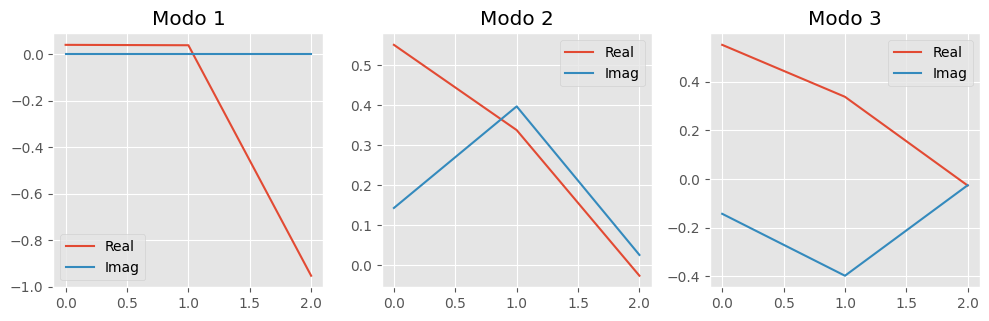

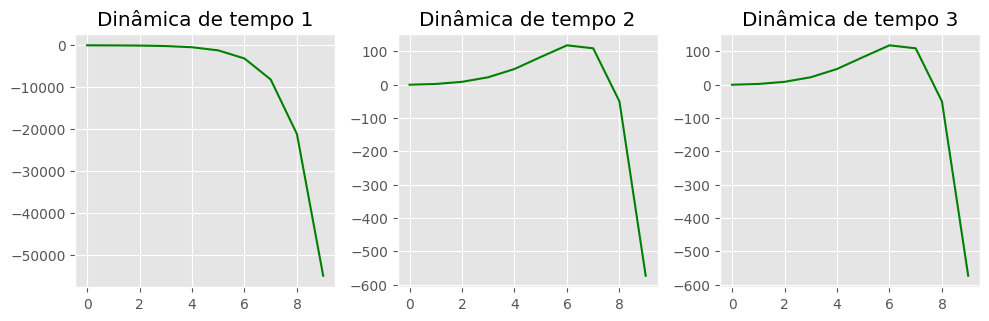

In [72]:
# Plotar os modos DMD
plt.figure(figsize=(10, 6))
for i in range(r):
    plt.subplot(2, r, i+1)
    plt.plot(np.real(Phi[:, i]), label='Real')
    plt.plot(np.imag(Phi[:, i]), label='Imag')
    plt.title(f'Modo {i+1}')
    plt.legend()
    plt.tight_layout()

# Plotar as dinâmicas de tempo
plt.figure(figsize=(10, 6))
for i in range(r):
    plt.subplot(2, r, i+1)
    plt.plot(time_dynamics[i, :], color = 'green')
    plt.title(f'Dinâmica de tempo {i+1}')
    plt.tight_layout()
plt.show()

Quanto aos gráficos de modo DMD (modo 1, 2 e 3 na primeira linha), é possível observar que em todos os modos a componente real sempre decai com o tempo, enquanto a parte imaginária mostra um comportamento diferente em cada modo. Em relação as dinâmicas de tempo, apesar de se manter constante ou crescente no inicio, percebe-se que em todas há uma queda brusca na parte final de todos os 3 gráficos.

# **Implementação DMD em python**

Aqui, utilizei uma implementação mais completa e organizada do DMD em python que encontrei a fim de praticar e fazer previsões utilizando o método.

In [74]:
import numpy as np
import pandas as pd

class DMD:

    def get_dmd_pair(self, df: pd.DataFrame, ts_length: int):
        y = df.to_numpy().flatten()
        data = [y[start : start + ts_length] for start in range(0, y.shape[0] - ts_length)]
        tensor = np.array(data).T
        self.x1 = tensor[:, :-1]
        self.x2 = tensor[:, 1:]
        self.x0 = self.x1[:, 0]

    def fit(self, df: pd.DataFrame, ts_length: int):
        self.get_dmd_pair(df=df, ts_length=ts_length)
        self.svd_x1()
        self.get_atilde()
        self.get_eig_atilde()
        self.get_dmd()

    def svd_x1(self, thresh=0.7):
        u, s, vt = np.linalg.svd(self.x1)
        q = np.cumsum(s) / np.sum(s)
        mask = q > thresh
        r = np.where(mask)[0][0]

        self.u = u[:, :r]
        self.s = s[:r]
        self.vt = vt[:r, :]

    def get_atilde(self):
        self.atilde = self.u.T @ self.x2 @ self.vt.T @ np.diag(1 / self.s)

    def get_eig_atilde(self):
        lamb, w = np.linalg.eig(self.atilde)
        self.lamb = lamb
        self.w = w

    def get_dmd(self):
        phi = self.x2 @ self.vt.T @ np.diag(1 / self.s) @ self.w
        self.phi = phi

    def predict_future(self, t: int):
        pseudophix0 = np.linalg.pinv(self.phi) @ self.x0.reshape(-1, 1)
        atphi = self.phi @ np.diag(self.lamb ** t)
        xt = (atphi @ pseudophix0).reshape(-1,)

        return np.real(xt)

## **Exemplo 1**

Nesse exemplo, os dados são gerados no próprio código (dados sintéticos) utilizando a função seno e em seguida é aplicado o método DMD.

<Figure size 640x480 with 0 Axes>

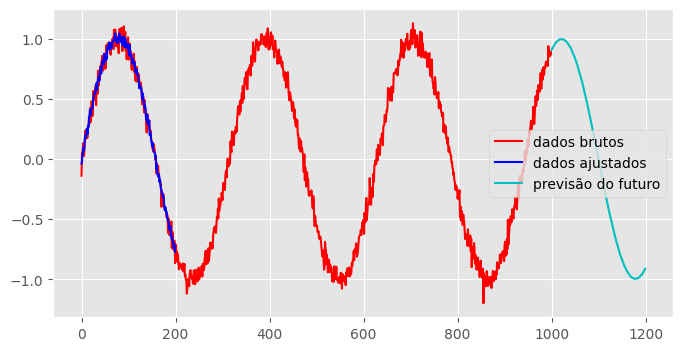

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

if __name__ == "__main__":
    x = np.arange(1000)
    y = np.sin(0.02 * x) + 5e-2 * np.random.randn(np.prod(x.shape))

    figsize = (8, 4)
    ts_length = 200

    dmd = DMD()
    dmd.fit(pd.DataFrame(y), ts_length=ts_length)

    fname = "synthetic-data.png"
    plt.clf()
    plt.figure(figsize=figsize)
    plt.plot(y, "r", label="dados brutos")

    t = 0
    pred_x = np.arange(t, t + ts_length)
    pred_y = dmd.predict_future(t)
    plt.plot(pred_x, pred_y, "b", label="dados ajustados")

    t = y.shape[0]
    pred_x = np.arange(t, t + ts_length)
    pred_y = dmd.predict_future(t)
    plt.plot(pred_x, pred_y, "c", label="previsão do futuro")
    plt.legend()
    plt.savefig(fname)

É perceptível que, com o uso desses dados sintéticos, foi possível fazer um ajuste com o modelo DMD e, a partir disso, tentar prever o comportamento futuro do gráfico (curva na cor ciano). Perceba que há certa variação/imprecisão nos dados não tratados que fazem com que a sua curva não fique tão "limpa" quanto a dos dados ajustados ou a da previsão.

## **Exemplo 2**

Nesse exemplo, o método DMD é aplicado a um conjunto de dados de temperaturas diárias mínimas, com o objetivo de ajustar um modelo DMD aos dados históricos de temperatura e usar esse modelo para fazer previsões de temperatura futura.

<Figure size 640x480 with 0 Axes>

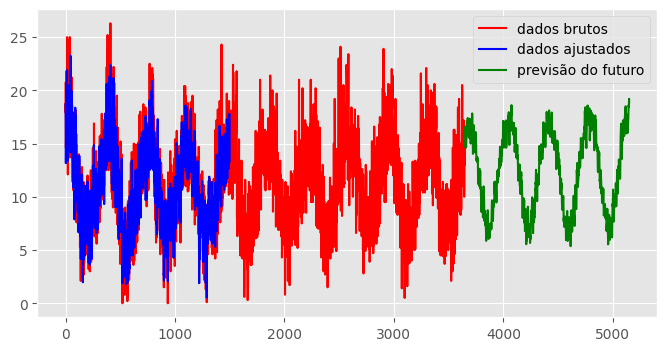

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")


def read_temperature(only_returns_temp: bool = True) -> pd.DataFrame:
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
    df_raw = pd.read_csv(url)

    if only_returns_temp:
        return df_raw[["Temp"]]

    return df_raw


def fit_dmd(ts_length: int) -> DMD:
    dmd = DMD()
    dmd.fit(df, ts_length=ts_length)
    return dmd


def make_pred_from_dmd(dmd: DMD, ts_length: int, df: pd.DataFrame, t: int):
    pred_x = np.arange(t, t + ts_length)
    pred_y = dmd.predict_future(t)
    return pred_x, pred_y


def main_plot(df: pd.DataFrame, fname: str):
    ts_length = 1500
    dmd = fit_dmd(ts_length)
    pred_x0, pred_y0 = make_pred_from_dmd(dmd, ts_length, df, 0)
    pred_x1, pred_y1 = make_pred_from_dmd(dmd, ts_length, df, df.shape[0])

    figsize = (8, 4)
    plt.clf()
    plt.figure(figsize=figsize)

    plt.plot(df, "r", label="dados brutos")
    plt.plot(pred_x0, pred_y0, "b", label="dados ajustados")
    plt.plot(pred_x1, pred_y1, "g", label="previsão do futuro")
    plt.legend()

    plt.savefig(fname)


if __name__ == "__main__":
    df = read_temperature()
    fname = "temperature-data.png"
    main_plot(df=df, fname=fname)

O gráfico gerado mostra os seguintes elementos:

Linha vermelha: Representa os dados brutos de temperatura diária mínima.

Linha azul: Representa os dados de temperatura ajustados pelo modelo DMD para o passado.

Linha verde: Representa as previsões de temperatura futura feitas pelo modelo DMD.

<br>

Portanto, esse gráfico, onde o eixo x representa o tempo e eixo y representa a temperatura mínima diária, ajuda a visualizar como o modelo DMD se ajusta aos dados históricos de temperatura e como ele faz previsões para o futuro com base nesse ajuste. Por ele, podemos concluir que a temperatura mínima diária futuramente tende a ser maior que $5$ e menor que $20$ graus. Isso mostra como O DMD pode permitir obter informações importantes a partir de observações experimentais ou simulações computacionais. Por isso, ele se faz uma ferramenta poderosa para a análise de dados dinâmicos e tem sido aplicado em diversas áreas de pesquisa.

# **Conclusão**

#### Em conclusão, o Dynamic Mode Decomposition (DMD) é uma técnica poderosa e versátil para analisar sistemas dinâmicos complexos e extrair informações valiosas a partir de dados temporais. Ao descompor a dinâmica temporal de um sistema em modos DMD, ele oferece uma maneira eficaz de identificar padrões, entender comportamentos subjacentes e fazer previsões futuras. Com isso, trata-se de uma ferramenta valiosa para cientistas e engenheiros que desejam explorar a dinâmica de sistemas complexos. Sua capacidade de descrever sistemas em termos de modos dinâmicos facilita a análise, a modelagem e a previsão de uma ampla gama de fenômenos temporais, tornando-o uma técnica valiosa na caixa de ferramentas de análise de dados e modelagem de sistemas dinâmicos.

# **Fontes e referências**

1. Dynamic Mode Decomposition: Theory and Applications. https://cwrowley.princeton.edu/theses/tu.pdf
2. Dynamic mode decomposition. https://en.wikipedia.org/wiki/Dynamic_mode_decomposition
3. Dynamic Mode Decomposition (Overview). https://www.youtube.com/watch?v=sQvrK8AGCAo
4. dynamic-mode-decomposition. https://github.com/mukappalambda/dynamic-mode-decomposition
5. Dynamic Mode Decomposition. https://hackmd.io/@mklan/HyLXh7UH_